In [1]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

import statsmodels.api as sm

# World happiness Dataset
Cílem je predikovat `Happiness Score` na základě ostatních vstupních proměných (`Economy (GDP per Capita)`, `Freedom` a další).

URL: https://www.kaggle.com/unsdsn/world-happiness

In [3]:
df_2015 = pd.read_csv(os.path.join('dataset', '2015.csv'))
df_2015.shape

(158, 12)

In [4]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


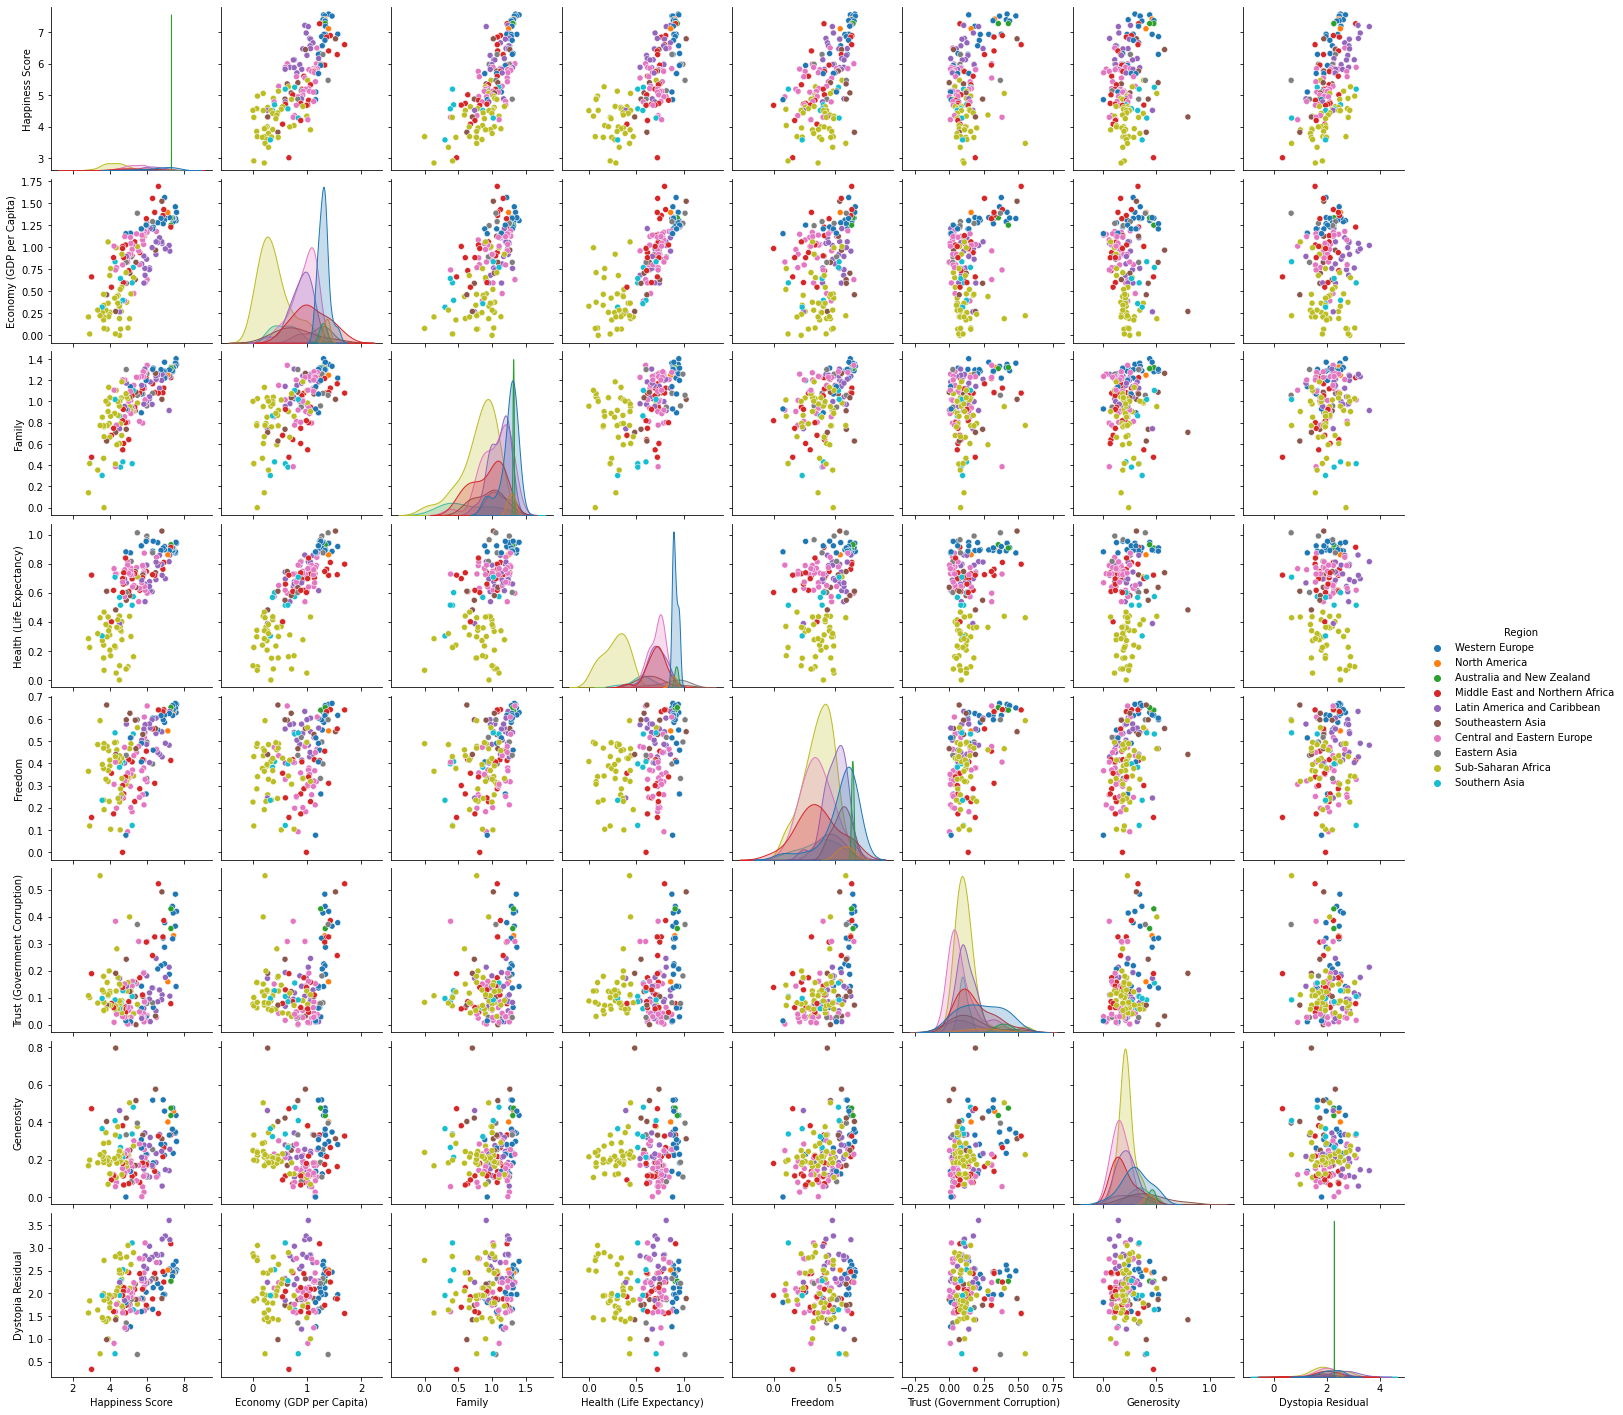

In [6]:
sns.pairplot(df_2015.drop(['Happiness Rank', 'Standard Error'], axis=1), hue='Region')

In [8]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
df_2015 = df_2015.sort_values(target_label)
train_input_vars = df_2015[[
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity']]
train_input_target = df_2015['Happiness Score']

X = sm.add_constant(train_input_vars)
model = sm.OLS(train_input_target, X).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     87.81
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.04e-46
Time:                        17:24:18   Log-Likelihood:                -126.46
No. Observations:                 158   AIC:                             266.9
Df Residuals:                     151   BIC:                             288.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.8602      0.190      9.766      0.000       1.484       2.237
Economy (GDP per Capita)          0.8607      0.220      3.907      0.000       0.425       1.296
Family                            1.4089      0.223      6.327      0.000       0.969       1.849
Health (Life Expectancy)          0.9753      0.316      3.084      0.002       0.350       1.600
Freedom                           1.3334      0.385      3.463      0.001       0.573       2.094
Trust (Government Corruption)     0.7845      0.437      1.797      0.074      -0.078       1.647
Generosity                        0.3889      0.391      0.995      0.321      -0.384       1.161
==============================================================================
Omnibus:                        1.753   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.324
Skew:                          -0.180   Prob(JB):                        0.516
Kurtosis:                       3.268   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""